# Sentiment Analysis with NLTK + TextBlob

# 1. Show data

In [7]:
import pandas as pd
df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\3) "
"sentiment dataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


# 2. Basic Data Cleaning & Visualization

🔹 Missing Values Before:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
🔹 Missing Values After:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732

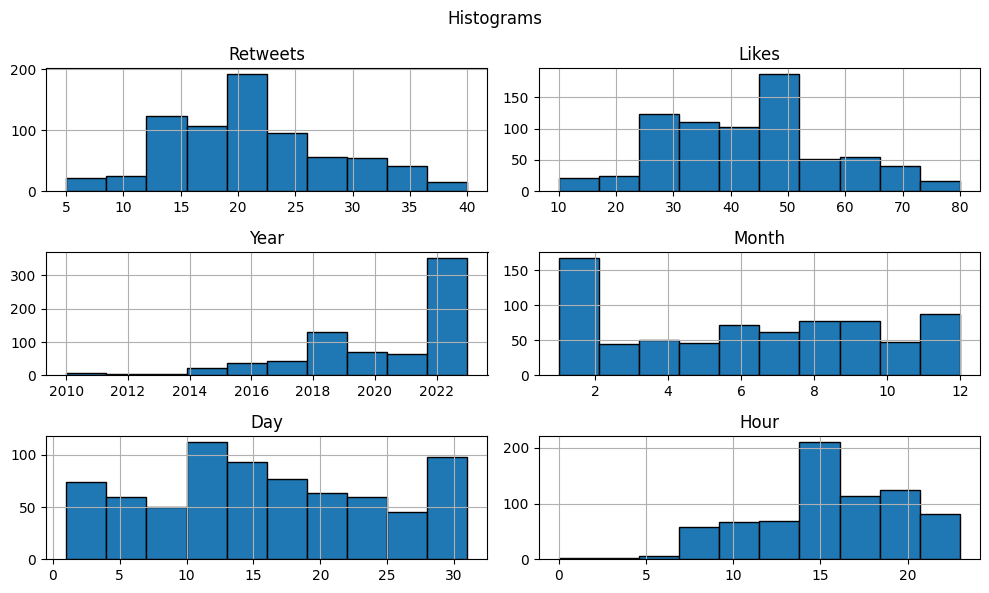

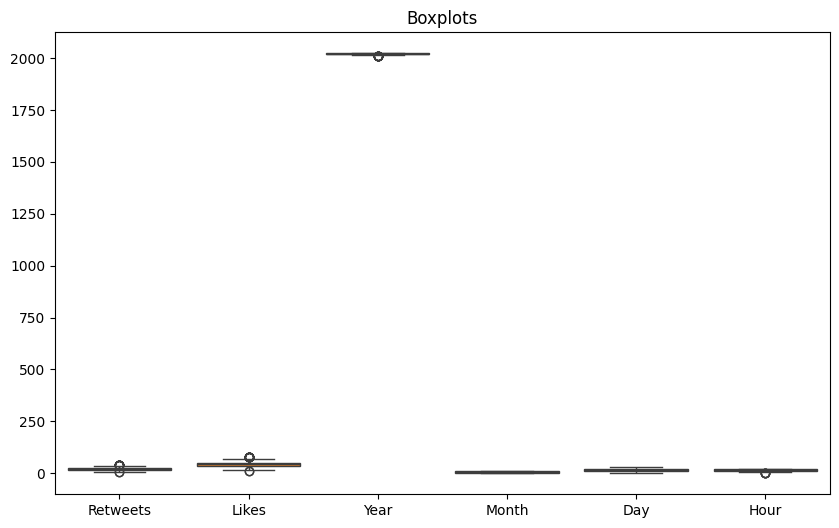

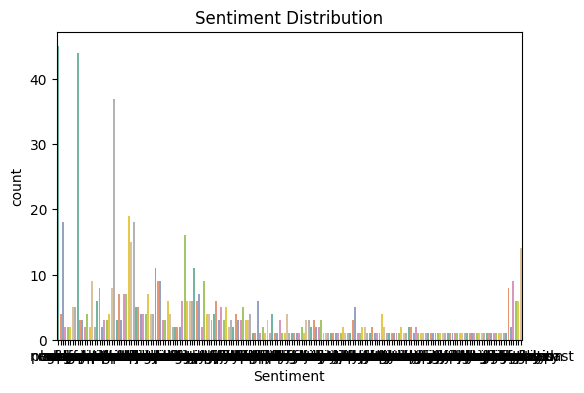

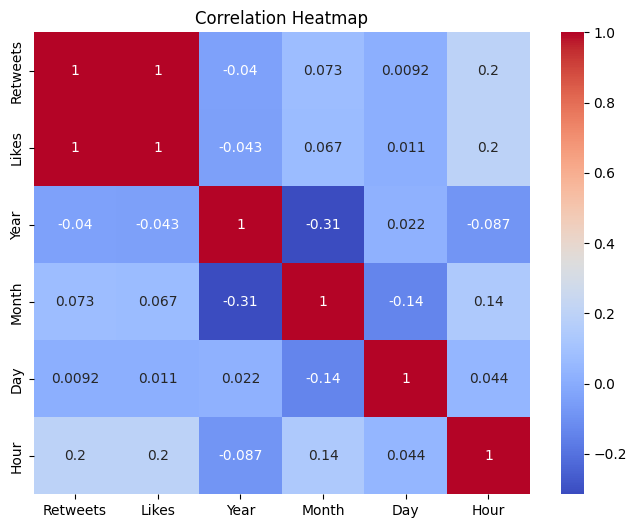

In [ ]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 2. Load Dataset
file_path = r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\3) Sentiment dataset.csv"
df = pd.read_csv(file_path)

# 3. Check and Handle Missing Values
print("🔹 Missing Values Before:")
print(df.isnull().sum())

# Fill numeric columns with mean
num_cols = ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
df['Sentiment'] = df['Sentiment'].fillna(df['Sentiment'].mode()[0])
df['Platform'] = df['Platform'].fillna(df['Platform'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

print("🔹 Missing Values After:")
print(df.isnull().sum())

# 4. Remove Duplicates
df.drop_duplicates(inplace=True)

# 5. Clean up sentiment column (standardize)
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

# 6. Summary Stats
print(df.info())
print(df.describe())
print("🔹 Median:\n", df.median(numeric_only=True))
print("🔹 Mode:\n", df.mode(numeric_only=True).iloc[0])
print("🔹 Std Dev:\n", df.std(numeric_only=True))

# 7. Create Output Folder
os.makedirs("plots_sentiment", exist_ok=True)

# 8. Histogram of Numeric Features
df[num_cols].hist(figsize=(10, 6), edgecolor='black')
plt.suptitle('Histograms')
plt.tight_layout()
plt.savefig("plots_sentiment/histograms_sentiment.png")
plt.show()

# 9. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots')
plt.savefig("plots_sentiment/boxplots_sentiment.png")
plt.show()

# 10. Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.savefig("plots_sentiment/sentiment_distribution.png")
plt.show()

# 11. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("plots_sentiment/correlation_heatmap_sentiment.png")
plt.show()

# 3. Add Time-Based Features & Trends

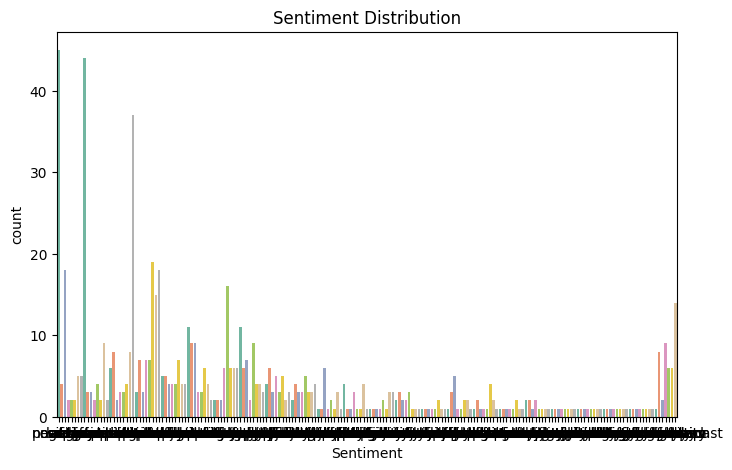

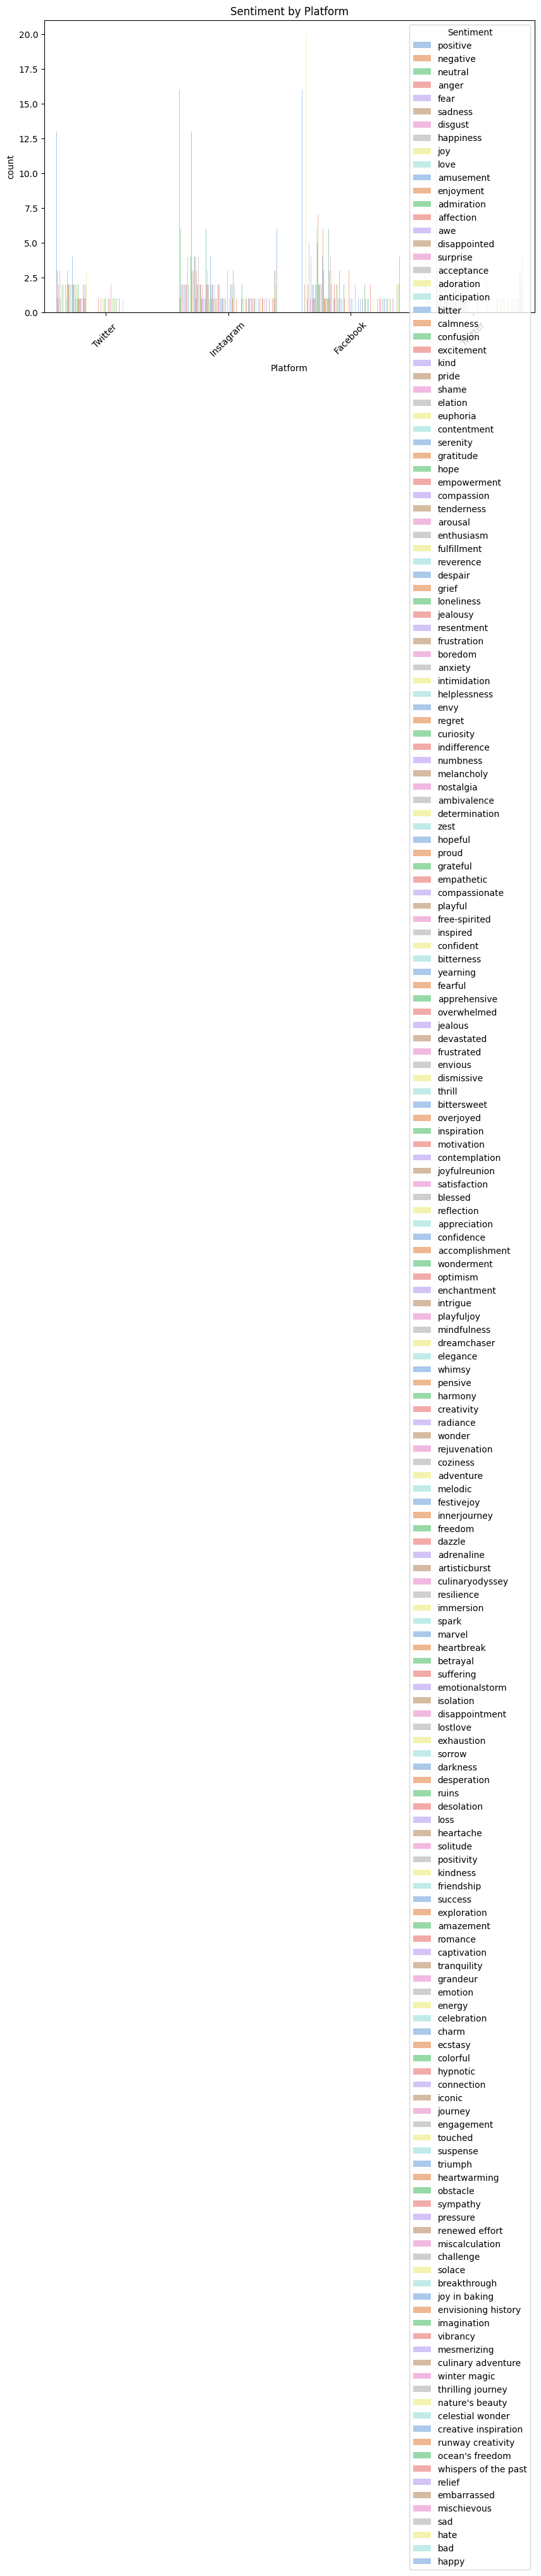

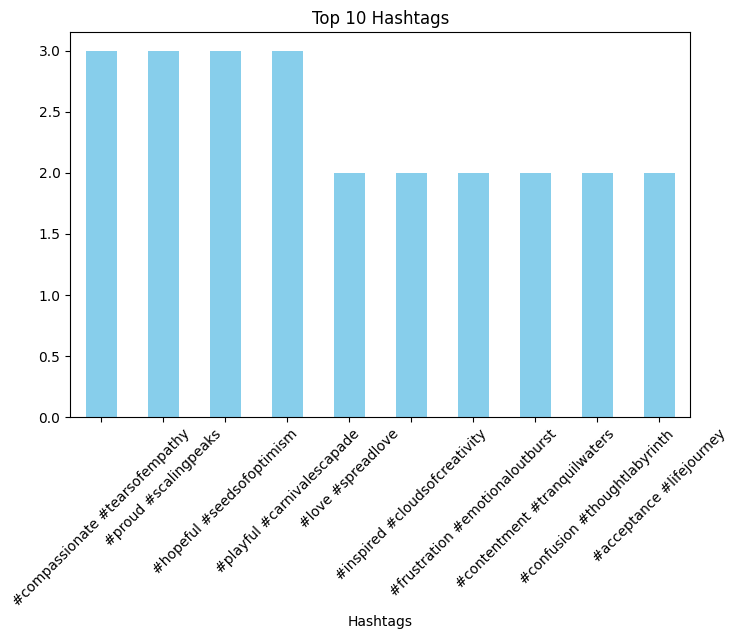

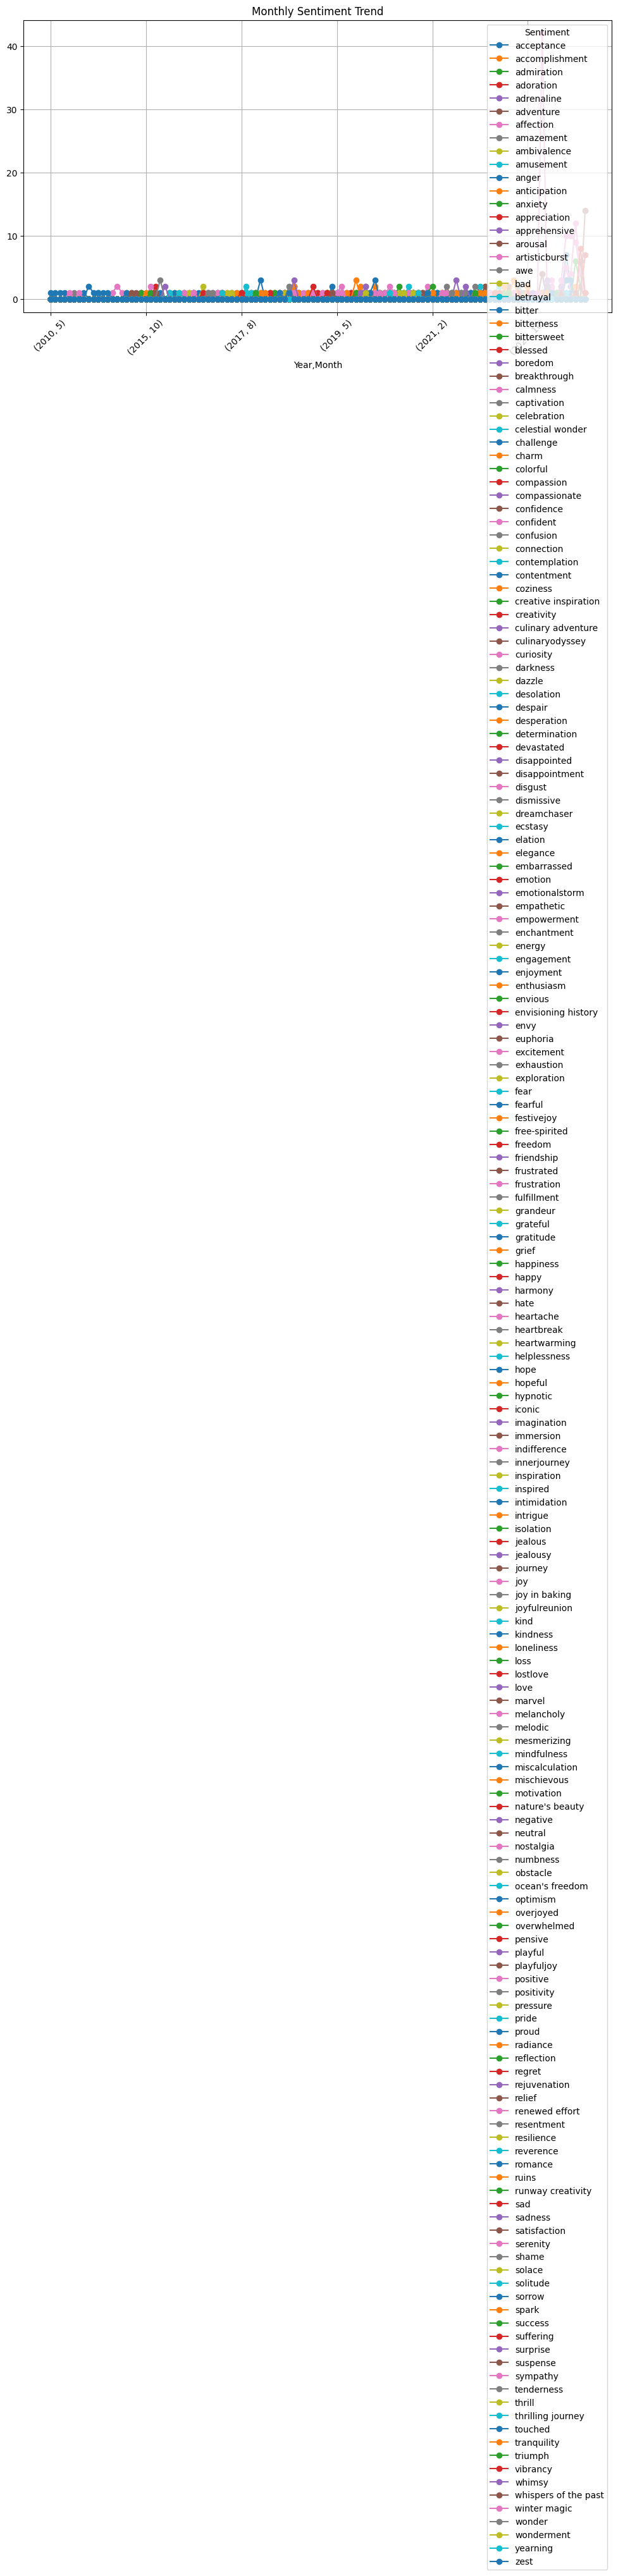

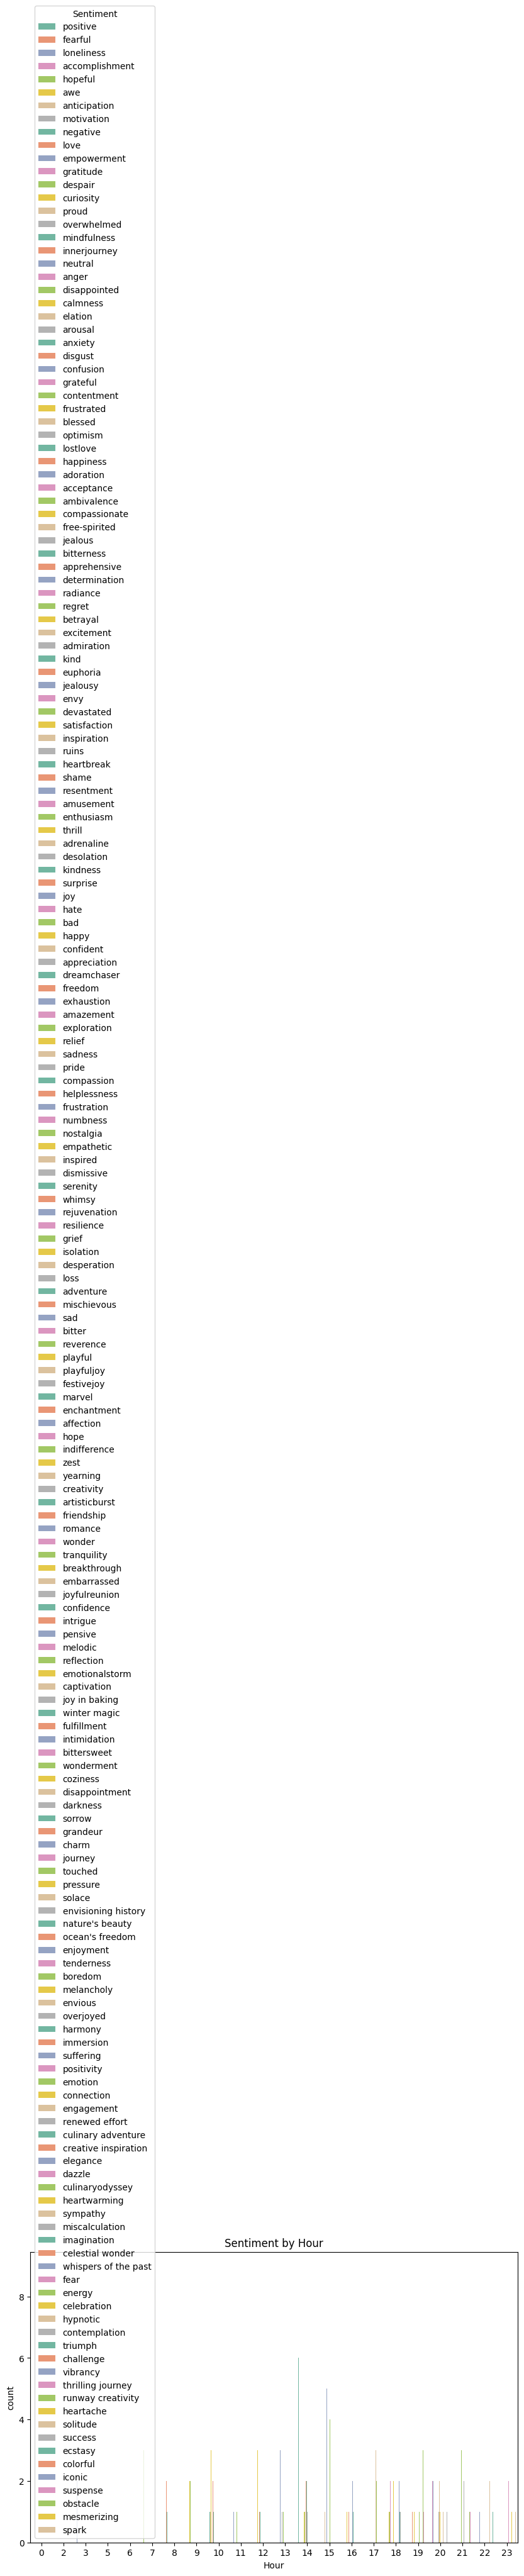

In [ ]:
# Part 1: Data Loading & Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\3) Sentiment dataset.csv")

# Drop junk columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore', inplace=True)

# Drop nulls in key columns
df.dropna(subset=['Text', 'Sentiment'], inplace=True)

# Convert Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract Time Features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Standardize Sentiment column
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

# Part 2: Visualizations
# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.show()

# Sentiment by Platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Sentiment', palette='pastel')
plt.title('Sentiment by Platform')
plt.xticks(rotation=45)
plt.show()

# Hashtags Analysis (if available)
if 'Hashtags' in df.columns:
    hashtags = df['Hashtags'].dropna().str.lower().str.split(',').explode().str.strip()
    top_hashtags = hashtags.value_counts().head(10)
    plt.figure(figsize=(8, 5))
    top_hashtags.plot(kind='bar', color='skyblue')
    plt.title("Top 10 Hashtags")
    plt.xticks(rotation=45)
    plt.show()

# Time Series: Sentiment Trend Monthly
monthly_sentiment = df.groupby(['Year', 'Month', 'Sentiment']).size().unstack().fillna(0)
monthly_sentiment.plot(marker='o', figsize=(12, 6))
plt.title("Monthly Sentiment Trend")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Sentiment by Hour
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', hue='Sentiment', palette='Set2')
plt.title("Sentiment by Hour")
plt.show()